# **Logistic Regression - rice_ml**
This notebook demonstrates how to use the LogisticRegression class within the rice_ml package. It demonstrates them in an informative way that also analyzes the results, mirroring a standard use case of the classes.

Note that when using this in robust model selection, k-fold cross-validation and deeper hyperparameter tuning is recommended. In this example, since it's main goal is demonstrating the classes, we will not do as deep of hyperparameter tuning, and will compare every test using the same random state (42).

This notebook shows how to:
- Use 'LogisticRegression' from 'rice_ml'
- Prepare and normalize data using 'rice_ml'
- Evaluate decision trees on a regression task

## Table of Contents
- [Algorithm](#algorithm)
- [Data Preparation](#data-preparation)
- [Logistic Regression](#Logistic-regression)
  - [Model Training](#model-training)
  - [Results](#results)

## Algorithm
Logistic regression is a supervised learning algorithm that is used for binary classification models, despite its name. Instead of predicting a continuous value, it models the probability that a data point belongs to a particular class. So the output is still a continuous value, but it is a probablity instead of a prediction.

The algorithm computes a linear combination of the input features and then applies the logistic (sigmoid) function to map the result into a probability between 0 and 1. This probability represents the model’s confidence that the input belongs to the positive class.

During training, logistic regression learns its parameters by minimizing a loss function called log loss. This loss penalizes confident but incorrect predictions more heavily. Optimization is typically performed using gradient descent or a related variant.

To make a prediction, a data point is passed through the model to produce a probability. This probability is then compared against a threshold (commonly 0.5) to assign a class label.

Logistic regression is widely used due to its simplicity, efficiency, and interpretability. While it is limited to linear decision boundaries in feature space, it serves as a strong baseline and performs very well when the classes are approximately linearly separable.

It is often used as a high quality baseline to compare against other, more complex models. It produces decent results and can provide useful information without much complexity.

![Logistic Regression Example](../images/log_reg.jpg)
Source: [Medium](https://medium.com/analytics-vidhya/the-story-of-logistic-regression-3a978fdc4fe2)

As you can see in the image, while logistic regression is a linear model and bounded by linear decision boundaries in the feature space, it's probabilities are not quite linear due to the logistic (sigmoid) function.

### Pros vs Cons
#### Pros
- Very interpretable probabilities
- Fast to train and to predict
- Works very well with approximately linear relationships
- Strong baseline for classification problems
#### Cons
- Limited to linear decision boundaries
- Sensitive to class imbalances (more of one class than another) without proper handling.
- Requires feature engineering and transformations for interactions and nonlinearity.

## Data Preparation
We will be using the MNIST digits dataset. It is a widely used benchmark for image classification. It contains 70,000 grayscale images of handwritten digits (0-9). Each image is 28x28 pixels.
For sake of runtime, we will be using a random 10,000 data point sample from the dataset.

X shape: (13782, 784)
y shape: (13782,)
X Overall Summary:
Mean: 0.122
Std: 0.298
Before normalization:
Mean (first 5 features): [0. 0. 0. 0. 0.]
Std  (first 5 features): [0. 0. 0. 0. 0.]


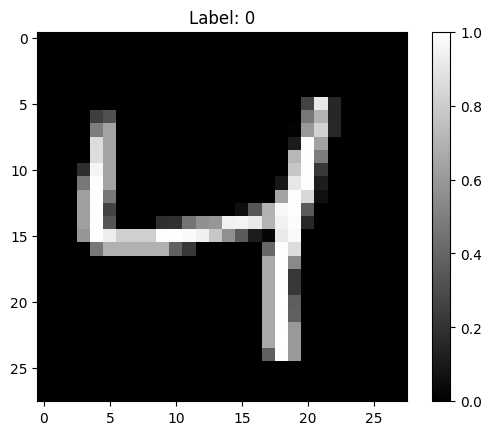

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from rice_ml.utilities import normalize, train_test_split

np.random.seed(42)

## Given that this implementation only supports binary outputs, we will use only 4 and 9 only.
### We are using these two because they tend to look similar, and other models have shown most
### of their inaccuracies are between these two. 
X_raw, y_raw = fetch_openml(
    "mnist_784",
    version=1,
    return_X_y=True,
    as_frame=False
)

mask = (y_raw == '4') | (y_raw == '9')

X_raw = X_raw[mask]
y_raw = y_raw[mask]

## To form binary outputs
### 0 will represent '4' and 1 will represent '9'
y_raw = (y_raw == '9').astype(int)

X = np.asarray(X_raw)
y = np.asarray(y_raw)

# Scaling
X = X / 255.0
y = y.astype(int)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("X Overall Summary:")
print(f"Mean: {X.mean():.3f}")
print(f"Std: {X.std():.3f}")

print("Before normalization:")
print("Mean (first 5 features):", np.round(X.mean(axis=0)[:5], 2))
print("Std  (first 5 features):", np.round(X.std(axis=0)[:5], 2))

image = X[0].reshape(28, 28)

plt.imshow(image, cmap="gray")
plt.title(f"Label: {y[0]}")
plt.colorbar()
plt.show()

## Linear Regression

### Model Training

Logistic Regression Accuracy: 0.899


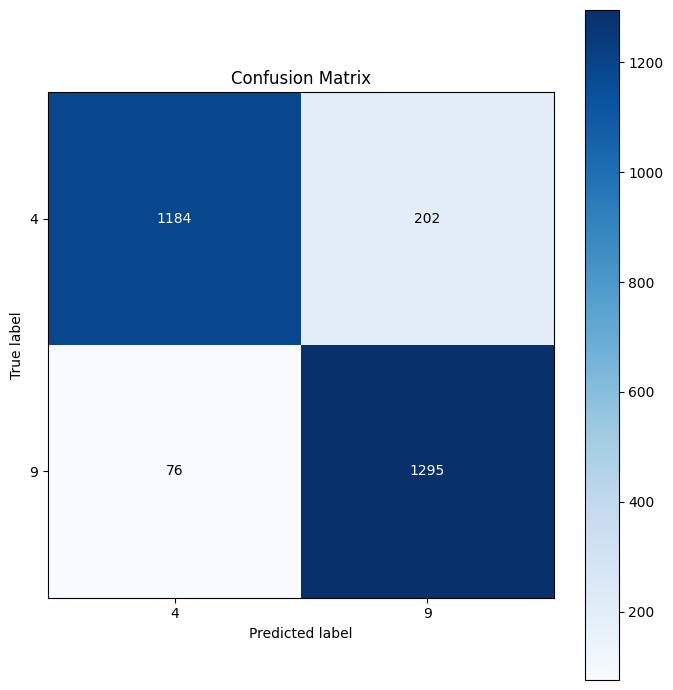

In [2]:
from rice_ml.supervised_learning.logistic_regression import LogisticRegression
from rice_ml.utilities.preprocess import train_test_split, normalize
from rice_ml.utilities.results import *

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

model = LogisticRegression(lr=0.1, tol=0.0001, penalty="l2")

model.fit(X_train, y_train)

results = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(f"Logistic Regression Accuracy: {accuracy:.3f}")
cm = confusion_matrix(y_test, results, num_classes=2)
plot_confusion_matrix(cm, class_labels=[4,9])

The model performs very good, especially without any transformations, normalization, or tuning. An 89.9% accuracy without any of that is exceptional, especially given how simple the model is.

Logistic regression is simple and very interpretable. It is often used as a base model for comparison. This is a decent result, and is a great baseline to compare to other models for this data.

While we do not do any of this in the example, it is recommend to inspect your data and transform any nonlinear features in a helpful way (sqrt, log, etc. depending on the feature shape), as well as handle any interactions. It is also recommended to do some hyperparameter tuning.

#### Z-Score Normalization

Logistic Regression Accuracy: 0.942


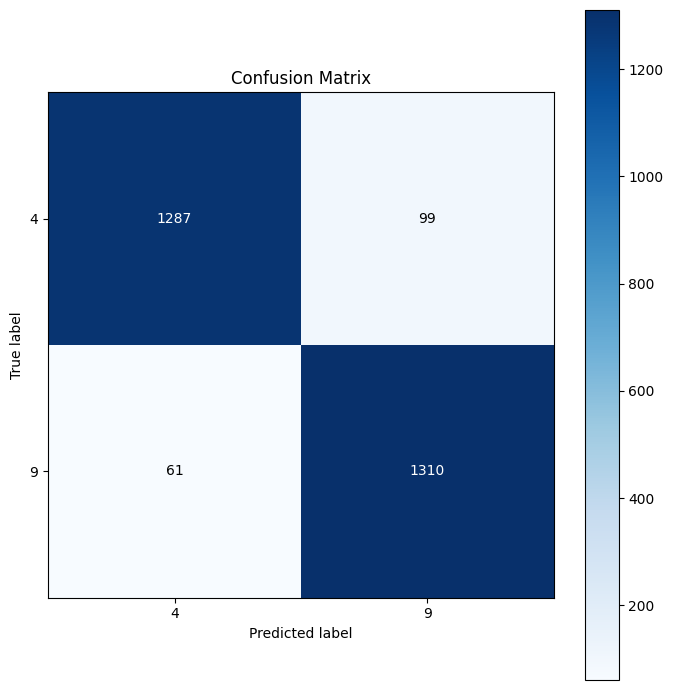

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

# Normalize on the training data to avoid data leakage.
X_train, stats = normalize(X_train, method="zscore", return_stats=True)
X_test = normalize(X_test, method="zscore", stats=stats)

model = LogisticRegression(lr=0.1, tol=0.0001, penalty="l2")

model.fit(X_train, y_train)

results = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(f"Logistic Regression Accuracy: {accuracy:.3f}")
cm = confusion_matrix(y_test, results, num_classes=2)
plot_confusion_matrix(cm, class_labels=[4,9])

### Results
We see a huge boost to accuracy, more than 4%, when we normalize the data. While the base model performed very well, this is a clear indicator as to why normalization is crucial when using logistic regression.
Logistic regression uses gradient descent, and normalized data allows gradient descent to converge faster while ensuring features contribute equally.

For example, if feature A is on the range [0,1] and feature B is on the range [0, 100], feature B will have a much more significant affect on the results than feature A. After normalizing though, they will be treated as equal features.

#### Error analysis
As we can see below, a lot of the mislabelled images are blurry. While to the human eye they can still be made out fairly easily, there is a clear pattern. The model struggles with blurry images. Since it is often used as a baseline, this can be a helpful fact to keep in mind as you perform error analysis for other, more complex models.

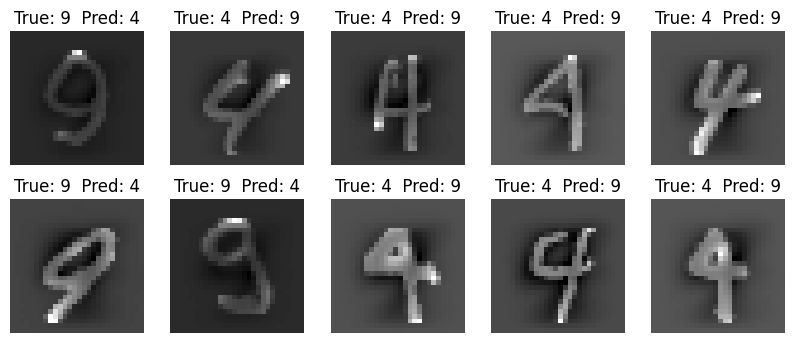

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Normalize on the training data to avoid data leakage.
X_train, stats = normalize(X_train, method="zscore", return_stats=True)
X_test = normalize(X_test, method="zscore", stats=stats)

model = LogisticRegression()

model.fit(X_train, y_train)

results = model.predict(X_test)
accuracy = model.score(X_test, y_test)


errors = (results != y_test)
X_err = X_test[errors]
y_err = y_test[errors]
y_pred_err = results[errors]

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    y_err_val = 4
    if y_err[i] == 1:
        y_err_val = 9

    y_pred_err_val = 4
    if y_pred_err[i] == 1:
        y_pred_err_val = 9
    ax.imshow(X_err[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"True: {y_err_val}  Pred: {y_pred_err_val}")
    ax.axis("off")
